# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

664

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#Create Lists
ciudades = []
country = []
lat = []
lng = []
temp = []
humidity = []
clouds = []
wind = []
date = []
record_counter = 0
set_counter = 0

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key 

print('Beginning Data Retrieval')
print('------------------------')

for city in cities:
    query_url = url + "&q=" + city
    # Get weather data
    response = requests.get(query_url).json()
    if record_counter < 50:
        record_counter += 1
    else:
        set_counter += 1
        record_counter = 0

    print('Processing record {} of set {} | {}'.format(record_counter, set_counter, city))
    print(url)
    try:
        country.append(response['sys']['country'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        clouds.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        date.append(response['dt'])
        ciudades.append(city)
    except:
        print("City not found!")
        pass

print('Data Retrieval Complete')


Beginning Data Retrieval
------------------------
Processing record 1 of set 0 | cairns
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c4210b821a3618dc94da7d73e8e82b8
Processing record 2 of set 0 | bredasdorp
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c4210b821a3618dc94da7d73e8e82b8
Processing record 3 of set 0 | iqaluit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c4210b821a3618dc94da7d73e8e82b8
Processing record 4 of set 0 | attawapiskat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c4210b821a3618dc94da7d73e8e82b8
City not found!
Processing record 5 of set 0 | port alfred
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c4210b821a3618dc94da7d73e8e82b8
Processing record 6 of set 0 | sola
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c4210b821a3618dc94da7d73e8e82b8
Processing record 7 of set 0 | east london
http://api.openweathermap.org/data/2.5/weat

Processing record 7 of set 1 | bluff
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c4210b821a3618dc94da7d73e8e82b8
Processing record 8 of set 1 | skalat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c4210b821a3618dc94da7d73e8e82b8
Processing record 9 of set 1 | bathsheba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c4210b821a3618dc94da7d73e8e82b8
Processing record 10 of set 1 | muros
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c4210b821a3618dc94da7d73e8e82b8
Processing record 11 of set 1 | portland
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c4210b821a3618dc94da7d73e8e82b8
Processing record 12 of set 1 | atambua
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c4210b821a3618dc94da7d73e8e82b8
Processing record 13 of set 1 | ortakoy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c4210b821a3618dc94da7d73e8e82b8
Processing record 

Processing record 14 of set 2 | pisco
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c4210b821a3618dc94da7d73e8e82b8
Processing record 15 of set 2 | opuwo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c4210b821a3618dc94da7d73e8e82b8
Processing record 16 of set 2 | victoria
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c4210b821a3618dc94da7d73e8e82b8
Processing record 17 of set 2 | yellowknife
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c4210b821a3618dc94da7d73e8e82b8
Processing record 18 of set 2 | amudat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c4210b821a3618dc94da7d73e8e82b8
Processing record 19 of set 2 | mys shmidta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c4210b821a3618dc94da7d73e8e82b8
City not found!
Processing record 20 of set 2 | yishui
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c4210b821a3618dc94da7d73e8

Processing record 22 of set 3 | mahanoro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c4210b821a3618dc94da7d73e8e82b8
Processing record 23 of set 3 | roebourne
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c4210b821a3618dc94da7d73e8e82b8
Processing record 24 of set 3 | luderitz
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c4210b821a3618dc94da7d73e8e82b8
Processing record 25 of set 3 | kodiak
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c4210b821a3618dc94da7d73e8e82b8
Processing record 26 of set 3 | rocha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c4210b821a3618dc94da7d73e8e82b8
Processing record 27 of set 3 | kapaa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c4210b821a3618dc94da7d73e8e82b8
Processing record 28 of set 3 | nguiu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c4210b821a3618dc94da7d73e8e82b8
City not found!


Processing record 28 of set 4 | illoqqortoormiut
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c4210b821a3618dc94da7d73e8e82b8
City not found!
Processing record 29 of set 4 | port moresby
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c4210b821a3618dc94da7d73e8e82b8
Processing record 30 of set 4 | malartic
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c4210b821a3618dc94da7d73e8e82b8
Processing record 31 of set 4 | beringovskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c4210b821a3618dc94da7d73e8e82b8
Processing record 32 of set 4 | puerto colombia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c4210b821a3618dc94da7d73e8e82b8
Processing record 33 of set 4 | bamiantong
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c4210b821a3618dc94da7d73e8e82b8
Processing record 34 of set 4 | castro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=

Processing record 35 of set 5 | mapiri
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c4210b821a3618dc94da7d73e8e82b8
Processing record 36 of set 5 | san policarpo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c4210b821a3618dc94da7d73e8e82b8
Processing record 37 of set 5 | college
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c4210b821a3618dc94da7d73e8e82b8
Processing record 38 of set 5 | oudtshoorn
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c4210b821a3618dc94da7d73e8e82b8
Processing record 39 of set 5 | quatre cocos
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c4210b821a3618dc94da7d73e8e82b8
Processing record 40 of set 5 | amderma
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c4210b821a3618dc94da7d73e8e82b8
City not found!
Processing record 41 of set 5 | fortuna
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c4210b821a3618dc

Processing record 42 of set 6 | dovers
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c4210b821a3618dc94da7d73e8e82b8
Processing record 43 of set 6 | madhupur
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c4210b821a3618dc94da7d73e8e82b8
Processing record 44 of set 6 | acajutla
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c4210b821a3618dc94da7d73e8e82b8
Processing record 45 of set 6 | stabat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c4210b821a3618dc94da7d73e8e82b8
Processing record 46 of set 6 | manaquiri
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c4210b821a3618dc94da7d73e8e82b8
Processing record 47 of set 6 | gorkovskoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c4210b821a3618dc94da7d73e8e82b8
City not found!
Processing record 48 of set 6 | velsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c4210b821a3618dc94da7d73e

Processing record 49 of set 7 | red bluff
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c4210b821a3618dc94da7d73e8e82b8
Processing record 50 of set 7 | kirakira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c4210b821a3618dc94da7d73e8e82b8
Processing record 0 of set 8 | rungata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c4210b821a3618dc94da7d73e8e82b8
City not found!
Processing record 1 of set 8 | bonthe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c4210b821a3618dc94da7d73e8e82b8
Processing record 2 of set 8 | tiksi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c4210b821a3618dc94da7d73e8e82b8
Processing record 3 of set 8 | dunmore town
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c4210b821a3618dc94da7d73e8e82b8
Processing record 4 of set 8 | teguldet
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c4210b821a3618dc94da7d73e8e8

Processing record 6 of set 9 | marsaxlokk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c4210b821a3618dc94da7d73e8e82b8
Processing record 7 of set 9 | yanam
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c4210b821a3618dc94da7d73e8e82b8
Processing record 8 of set 9 | sibolga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c4210b821a3618dc94da7d73e8e82b8
Processing record 9 of set 9 | kokstad
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c4210b821a3618dc94da7d73e8e82b8
Processing record 10 of set 9 | zhezkazgan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c4210b821a3618dc94da7d73e8e82b8
Processing record 11 of set 9 | aktau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c4210b821a3618dc94da7d73e8e82b8
Processing record 12 of set 9 | port-gentil
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c4210b821a3618dc94da7d73e8e82b8
Processing 

Processing record 13 of set 10 | the valley
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c4210b821a3618dc94da7d73e8e82b8
Processing record 14 of set 10 | laval
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c4210b821a3618dc94da7d73e8e82b8
Processing record 15 of set 10 | marcona
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c4210b821a3618dc94da7d73e8e82b8
City not found!
Processing record 16 of set 10 | grass valley
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c4210b821a3618dc94da7d73e8e82b8
Processing record 17 of set 10 | okhotsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c4210b821a3618dc94da7d73e8e82b8
Processing record 18 of set 10 | lasa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c4210b821a3618dc94da7d73e8e82b8
Processing record 19 of set 10 | urdzhar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c4210b821a3618dc94d

Processing record 20 of set 11 | atchison
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c4210b821a3618dc94da7d73e8e82b8
Processing record 21 of set 11 | sambava
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c4210b821a3618dc94da7d73e8e82b8
Processing record 22 of set 11 | lokachi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c4210b821a3618dc94da7d73e8e82b8
Processing record 23 of set 11 | san vicente
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c4210b821a3618dc94da7d73e8e82b8
Processing record 24 of set 11 | kargil
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c4210b821a3618dc94da7d73e8e82b8
Processing record 25 of set 11 | manuk mangkaw
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c4210b821a3618dc94da7d73e8e82b8
Processing record 26 of set 11 | kabarnet
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c4210b821a3618dc94da7d73e8e

Processing record 27 of set 12 | totness
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c4210b821a3618dc94da7d73e8e82b8
Processing record 28 of set 12 | lahat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c4210b821a3618dc94da7d73e8e82b8
Processing record 29 of set 12 | fonte boa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c4210b821a3618dc94da7d73e8e82b8
Processing record 30 of set 12 | shumikha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c4210b821a3618dc94da7d73e8e82b8
Processing record 31 of set 12 | sinnamary
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c4210b821a3618dc94da7d73e8e82b8
Processing record 32 of set 12 | guaratinga
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c4210b821a3618dc94da7d73e8e82b8
Processing record 33 of set 12 | malmesbury
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c4210b821a3618dc94da7d73e8e82

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
my_weather = {
    "City": ciudades,"Country" : country, 
    "Lat" : lat,"Lng" : lng, "Temp": temp,
    "Humidity" : humidity, "Cloudiness" : clouds,
    "Wind Speed" : wind, "Date" : date}

weather = pd.DataFrame(my_weather)
weather.to_csv(r'My_Weather.csv', index = False)



## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [5]:
(weather["Humidity"] > 100).any()

False

In [6]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

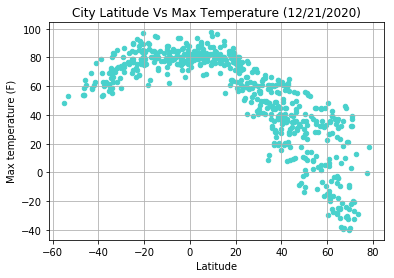

In [7]:
date = datetime.datetime.fromtimestamp(
        int(weather['Date'][0])
    ).strftime('%m/%d/%Y')

weather.plot(kind='scatter', x='Lat', y='Temp', c='mediumturquoise')
plt.title('City Latitude Vs Max Temperature ({})'.format(date) )
plt.xlabel('Latitude')
plt.ylabel('Max temperature (F)')
plt.grid()
plt.savefig("LatVsMaxTemp.png")

## Latitude vs. Humidity Plot

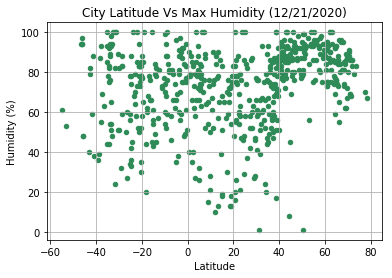

In [8]:
weather.plot(kind='scatter',x='Lat',y='Humidity', c='seagreen')
plt.title('City Latitude Vs Max Humidity ({})'.format(date) )
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.savefig("LatVsHumidity.png")

## Latitude vs. Cloudiness Plot

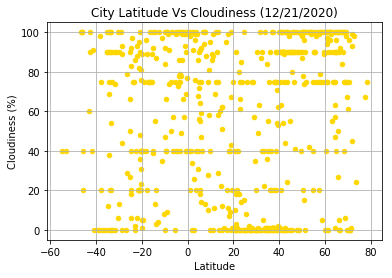

In [9]:
weather.plot(kind='scatter',x='Lat',y='Cloudiness', c='gold')
plt.title('City Latitude Vs Cloudiness ({})'.format(date) )
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.savefig("LatVsCloudiness.png")


## Latitude vs. Wind Speed Plot

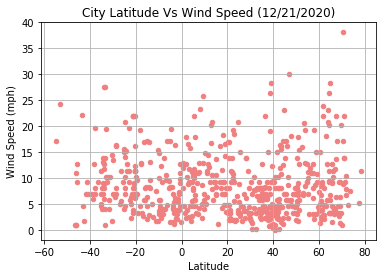

In [10]:
weather.plot(kind='scatter',x='Lat',y='Wind Speed', c='lightcoral')
plt.title('City Latitude Vs Wind Speed ({})'.format(date) )
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()
plt.savefig("LatVsWindSpeed.png")

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [29]:
north = weather.loc[weather["Lat"] >= 0]
south = weather.loc[weather["Lat"] < 0]
#north

,City,Country,Lat,Lng,Temp,Humidity,Cloudiness,Wind Speed,Date
2,iqaluit,CA,63.75,-68.51,10.40,78,90,12.75,1608563971
6,qaqortoq,GL,60.72,-46.03,26.60,73,75,4.92,1608564184
8,saint george,US,37.10,-113.58,28.40,50,1,3.58,1608563893
12,hilo,US,19.73,-155.09,71.60,83,75,4.74,1608564185
15,saskylakh,RU,71.92,114.08,-20.56,86,99,10.47,1608564185
17,ponta do sol,PT,32.67,-17.10,68.00,60,40,3.36,1608564186
19,kavaratti,IN,10.57,72.64,81.91,61,86,5.03,1608564186
22,thompson,CA,55.74,-97.86,-11.20,76,90,3.15,1608564187
23,miyako,JP,39.64,141.95,30.20,92,2,4.72,1608564187
25,pindwara,IN,24.80,73.07,62.01,29,15,3.83,1608564187


The r-squared is: 0.7271241411128468


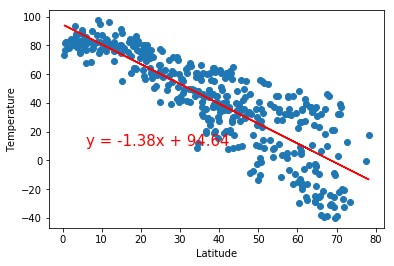

In [20]:
x_values = north['Lat']
y_values = north['Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel('Temperature')
print(f"The r-squared is: {rvalue**2}")
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.38287483104447906


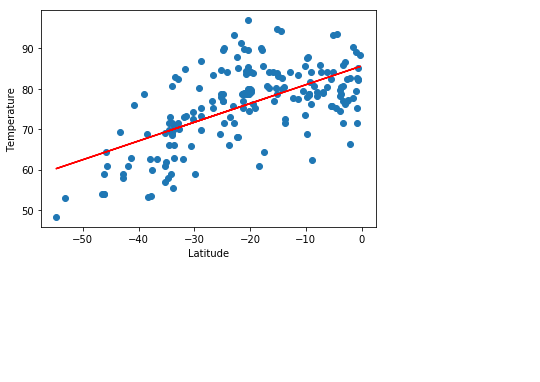

In [24]:
x_values_s = south['Lat']
y_values_s = south['Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_s, y_values_s)
regress_values_s = x_values_s * slope + intercept
line_eq_s = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values_s,y_values_s)
plt.plot(x_values_s,regress_values_s,"r-")
plt.annotate(line_eq_s,(6,10),fontsize=15)
plt.xlabel("Latitude")
plt.ylabel('Temperature')
print(f"The r-squared is: {rvalue**2}")
plt.show()


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.14455535075793863


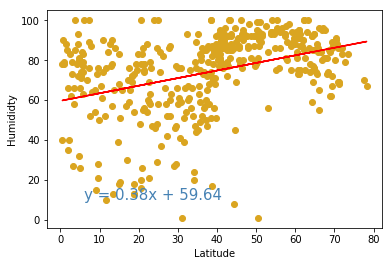

In [25]:
x = north['Lat']
y = north['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y, color = "goldenrod")
plt.plot(x,regress,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="steelblue")
plt.xlabel("Latitude")
plt.ylabel('Humididty')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0026084884582406524


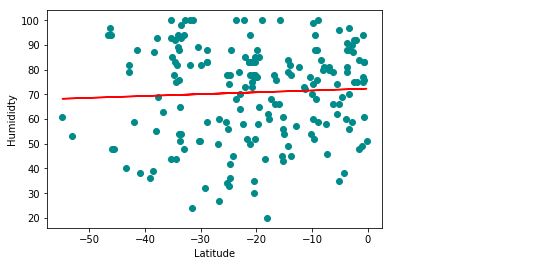

In [26]:
x = south['Lat']
y = south['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y, color = "darkcyan")
plt.plot(x,regress,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="tomato")
plt.xlabel("Latitude")
plt.ylabel('Humididty')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.048519534672001124


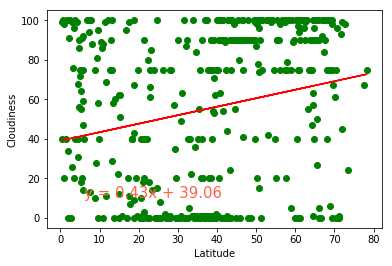

In [27]:
x = north['Lat']
y = north['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y, color = "green")
plt.plot(x,regress,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="tomato")
plt.xlabel("Latitude")
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.029651517193190216


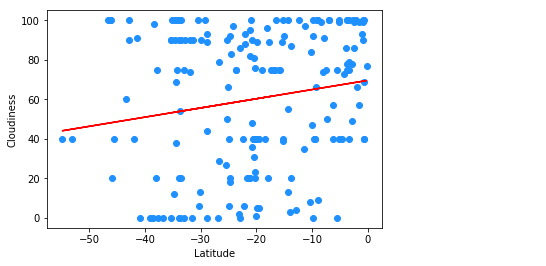

In [28]:
x = south['Lat']
y = south['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y, color = "dodgerblue")
plt.plot(x,regress,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="crimson")
plt.xlabel("Latitude")
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0002936876121294524


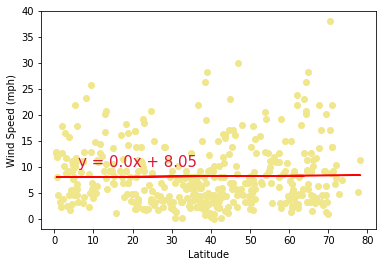

In [31]:
x = north['Lat']
y = north['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y, color = "khaki")
plt.plot(x,regress,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="crimson")
plt.xlabel("Latitude")
plt.ylabel('Wind Speed (mph)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.05247648013057979


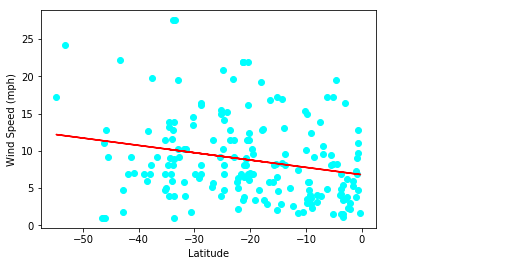

In [32]:
x = south['Lat']
y = south['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y, color = "aqua")
plt.plot(x,regress,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="crimson")
plt.xlabel("Latitude")
plt.ylabel('Wind Speed (mph)')
print(f"The r-squared is: {rvalue**2}")
plt.show()